### 데이터셋 불러오기

In [45]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras import models 
from tensorflow.keras.layers import Dense, Dropout

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("유방암 데이터셋: \n{}".format(cancer.keys()))
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터셋: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 형태: (569, 30)


In [10]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


유방암 데이터는 30개의 특성을 가지고 있으며 569개의 데이터를 가지고 있습니다.

In [11]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
print("데이터 정보:\n{}".format(cancer.DESCR))

데이터 정보:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean R

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

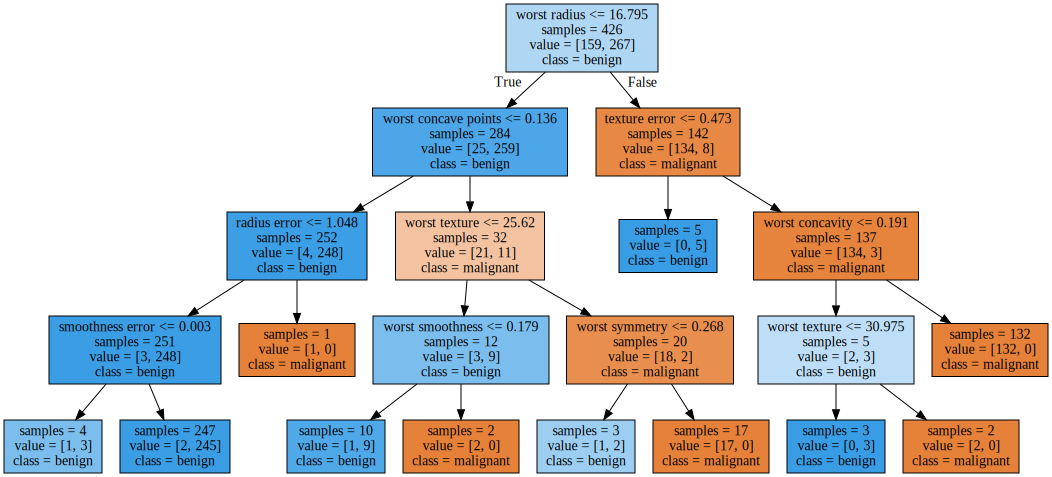

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [19]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


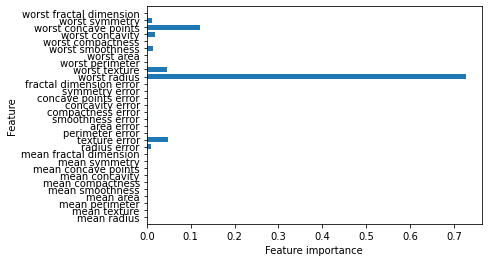

In [21]:
import matplotlib.pyplot as plt
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### 데이터 전처리

In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(0)

x = cancer.data
y = cancer.target

# x에 대해 최대최소 정규화 실시

scaler = MinMaxScaler()
scaler.fit(x)

x_scaled = scaler.transform(x)

In [23]:
# 정규화 후, 데이터 셋 속성 출력

print('정규화 전 특성별 최소값 : \n', x.min(axis=0))
print('정규화 전 특성별 최소값 : \n', x.max(axis=0))

print('정규화 후 특성별 최소값 : \n', x_scaled.min(axis=0))
print('정규화 후 특성별 최소값 : \n', x_scaled.max(axis=0))

정규화 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
정규화 전 특성별 최소값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
정규화 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
정규화 후 특성별 최소값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

### 딥러닝 모델 제작

In [25]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import os

model = models.Sequential()
model.add(Dense(32, input_dim = 30, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=50)

Epoch 1/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0520 - accuracy: 0.9899 - val_loss: 0.1323 - val_accuracy: 0.9708
Epoch 2/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9824 - val_loss: 0.1320 - val_accuracy: 0.9766
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.1323 - val_accuracy: 0.9766
Epoch 4/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 0.1320 - val_accuracy: 0.9766
Epoch 5/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.1365 - val_accuracy: 0.9708
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.1368 - val_accuracy: 0.9649
Epoch 7/30
8/8 [==============================] - 0s 3ms/step - loss: 0.0491 - accuracy: 0.9874 - val_loss: 0.1352 - val_accuracy: 0.9766
Epoch 8/30
8/8 [==================

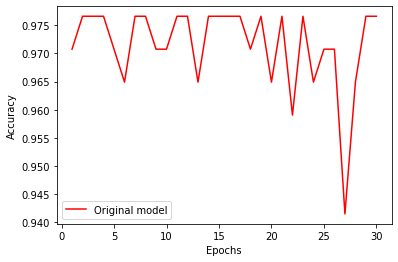

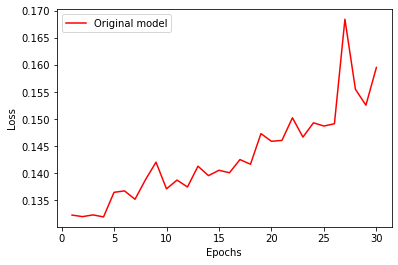

In [28]:
hist_dict = history.history

val_acc = hist_dict['val_accuracy']
val_loss = hist_dict['val_loss']

epochs = range(1, len(val_acc)+1)

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_acc, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ‘b’는 파란색 실선, 'r'은 빨간색 실선을 의미합니다
plt.plot(epochs, val_loss, 'r', label='Original model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [50]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.16664, saving model to ./model/01-0.1666.hdf5

Epoch 00002: val_loss improved from 0.16664 to 0.16652, saving model to ./model/02-0.1665.hdf5

Epoch 00003: val_loss improved from 0.16652 to 0.16572, saving model to ./model/03-0.1657.hdf5

Epoch 00004: val_loss did not improve from 0.16572

Epoch 00005: val_loss did not improve from 0.16572

Epoch 00006: val_loss did not improve from 0.16572

Epoch 00007: val_loss did not improve from 0.16572

Epoch 00008: val_loss did not improve from 0.16572

Epoch 00009: val_loss did not improve from 0.16572

Epoch 00010: val_loss did not improve from 0.16572

Epoch 00011: val_loss did not improve from 0.16572

Epoch 00012: val_loss did not improve from 0.16572

Epoch 00013: val_loss did not improve from 0.16572


In [51]:
model.predict(x_test[[10]])

array([[0.94331276]], dtype=float32)

In [52]:
new_model=tf.keras.models.load_model('./model/04-0.1613.hdf5')

In [53]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [54]:
new_model.predict(x_test[[3]])

array([[0.98721397]], dtype=float32)